In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [ ]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/milkdrop.bmp')

In [4]:
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [5]:
# 채널 나누기
R_img1, G_img1, B_img1=cv2.split(RGB_img1)
R_img2, G_img2, B_img2=cv2.split(RGB_img2)

In [6]:
# 출력 array 생성 후 0으로 초기화하기, unsigned byte(0~255) 로 설정
R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

In [7]:
# 고전적으로 과정 이해하며 빼기 계산 과정
# for 문 으로 픽셀 빼기 계산 ( 절대값 취함 )
for h in range(RGB_img1.shape[0]): # 영상 높이
  for w in range(RGB_img1.shape[1]): # 영상 너비
    R_plus[h,w] = np.abs(int(R_img1[h,w]) - int(R_img2[h,w]))
    G_plus[h,w] = np.abs(int(G_img1[h,w]) - int(G_img2[h,w]))
    B_plus[h,w] = np.abs(int(B_img1[h,w]) - int(B_img2[h,w]))

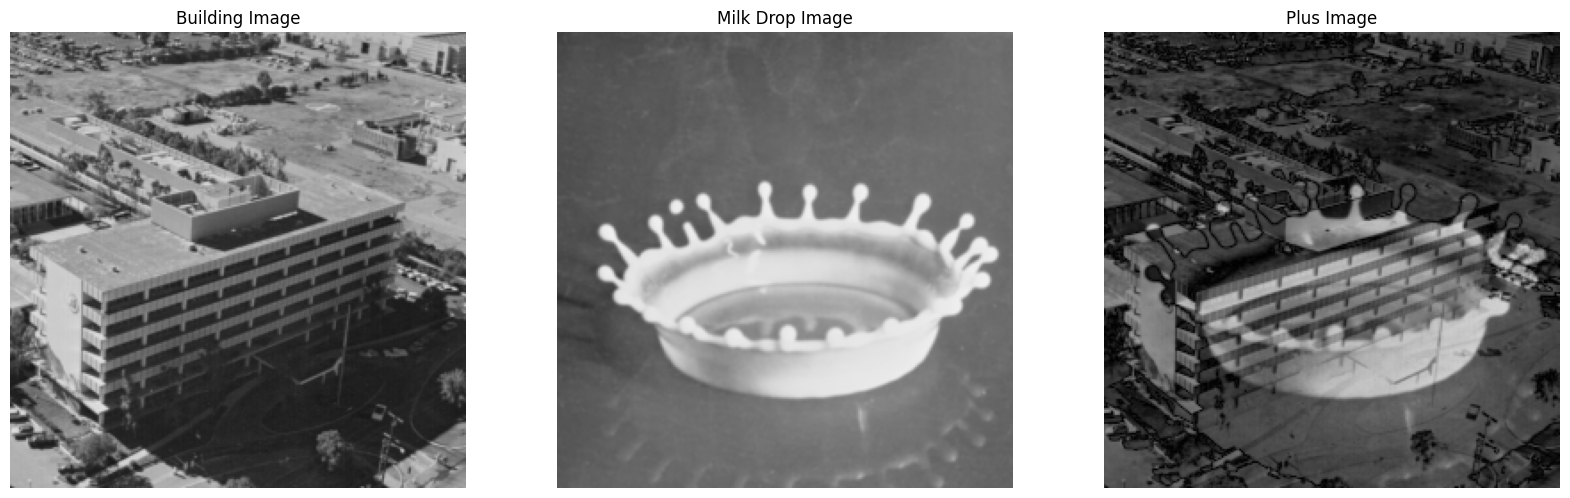

In [8]:
# 이미지 출력
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Building Image")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Milk Drop Image")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus # R채널만 선택
output_img[:,:,1]=G_plus # G채널만 선택
output_img[:,:,2]=B_plus # B채널만 선택
plt.title("Minus Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()